## Neural Network Practice

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta

data = yf.download(tickers='AMZN', start='2012-03-11', end='2022-07-10', auto_adjust=False)

data.columns = data.columns.droplevel(1)

data.reset_index(inplace=True)

data.columns.name = None

data.to_csv('amzn_data.csv')

AMZN_df = pd.read_csv('amzn_data.csv')

AMZN_df.drop(AMZN_df.columns[0], axis=1, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [2]:
AMZN_df['RSI'] = ta.rsi(AMZN_df['Close'], length = 15)
AMZN_df['EMAF'] = ta.ema(AMZN_df['Close'], length = 20)
AMZN_df['EMAM'] = ta.ema(AMZN_df['Close'], length = 100)
AMZN_df['EMAS'] = ta.ema(AMZN_df['Close'], length = 150)

In [3]:
AMZN_df['Target'] = (AMZN_df['Adj Close'] - AMZN_df['Open']).shift(-1)

AMZN_df['TargetClass'] = np.where(AMZN_df['Target'] > 0, 1, 0)

AMZN_df['TargetNextClose'] = (AMZN_df['Adj Close']).shift(-1)

In [4]:
AMZN_df.dropna(inplace = True)
AMZN_df.reset_index(drop = True, inplace = True)
AMZN_df.drop(['Volume', 'Close','Date'], axis = 1, inplace = True)

In [5]:
data_set = AMZN_df.iloc[:, 0:11]
pd.set_option('display.max_columns', None)

In [6]:
print(data_set.shape)
print(AMZN_df.shape)
print(type(data_set))

(2449, 11)
(2449, 11)
<class 'pandas.core.frame.DataFrame'>


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.0067278  0.00680399 0.00681594 ... 0.40743646 0.         0.006198  ]
 [0.006198   0.00572166 0.00682169 ... 0.41294618 1.         0.0067164 ]
 [0.0067164  0.00553    0.00584429 ... 0.40715458 0.         0.00664804]
 ...
 [0.58373995 0.57961847 0.54855821 ... 0.46694151 1.         0.58846821]
 [0.58846821 0.58751042 0.58127244 ... 0.5366458  1.         0.5998616 ]
 [0.5998616  0.59602242 0.58978156 ... 0.45771593 1.         0.59536121]]


In [8]:
X = []

backcandles = 50

print(data_set_scaled.shape[0])

for j in range(8):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):
        X[j].append(data_set_scaled[i - backcandles:i,j])

X = np.moveaxis(X, [0], [2])

X,yi = np.array(X), np.array(data_set_scaled[backcandles:, -1])
y = np.reshape(yi,(len(yi),1))

print(X.shape)
print(y.shape)

2449
(2399, 50, 8)
(2399, 1)


In [9]:
splitlimit = int(len(X)*.8)
print(splitlimit)

X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]

1919


In [13]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

2025-04-06 18:34:50.963617: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 8), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0049 - val_loss: 0.0025
Epoch 2/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.2230e-04 - val_loss: 0.0022
Epoch 3/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.0249e-04 - val_loss: 0.0016
Epoch 4/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.8998e-05 - val_loss: 9.8819e-04
Epoch 5/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 1.1383e-04 - val_loss: 9.2569e-04
Epoch 6/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.9238e-05 - val_loss: 0.0012
Epoch 7/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 9.9399e-05 - val_loss: 0.0011
Epoch 8/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.0279e-04 - val_loss: 7.6530e-04
Epoch 9/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 9.1389e-05 - val_loss: 9.2481e-04
Epoch 10/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.3317e-05 - val_loss: 7.9918e-04
Epoch 11/30
116/116 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 9.3341e-05 

In [21]:
pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


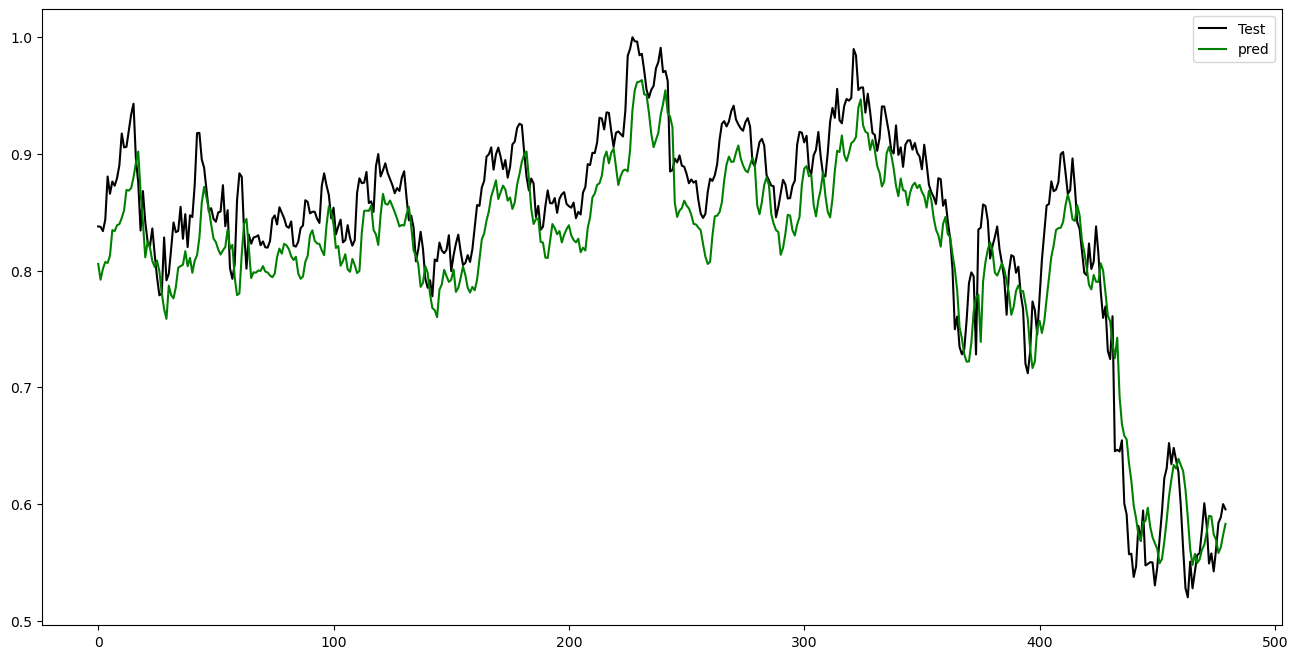

In [16]:
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
r2_pred = r2_score(y_train, pred_train)
print(f'R-squared: {r2:.2f}')
print(f'R-squared: {r2_pred:.2f}')

R-squared: 0.85
R-squared: 1.00
